## Step 0: Import libraries and dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import warnings
warnings.filterwarnings('ignore') 


In [2]:
#Reading in the data 
df = pd.read_csv(r'C:\Users\HP\Downloads\movies.csv')

## Step 1: Understanding the dataset


In [3]:
#Dataset dimensions-(rows, columns)
df.shape


(7668, 15)

In [4]:
#Basic Overview of the data
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Step 2: Data Preprocessing and Cleaning

In [5]:
#Dropping columns we dont need

columns_to_drop = ['rating', 'country', 'runtime']
df.drop(columns_to_drop, axis='columns', inplace=True)

In [6]:
#Dropping rows with null values
df = df.dropna()


In [7]:
#Dropping rows with duplicate values
df= df.drop_duplicates()

In [8]:
#Dataset new dimensions-(rows, columns)
df.shape
df.shape

(5434, 12)

In [9]:
df.describe()

,year,score,votes,budget,gross
count,5434.000000,5434.000000,5.434000e+03,5.434000e+03,5.434000e+03
mean,2001.657159,6.392915,1.149532e+05,3.595035e+07,1.030417e+08
std,10.539613,0.963233,1.842463e+05,4.155080e+07,1.871295e+08
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.068192e+07
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.674427e+07
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119868e+08
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09


In [10]:
#Seeing Datatypes of Columns
df.dtypes

name         object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
budget      float64
gross       float64
company      object
dtype: object

In [11]:
#Changing dataypes of Budget and Gross columns
df.budget=df.budget.astype('int64')
df.gross=df.gross.astype('int64')
df.votes=df.votes.astype('int64')


In [12]:
#verifying
df.dtypes

name         object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
budget        int64
gross         int64
company      object
dtype: object

In [13]:
#Ordering the data by Gross revenue
df = df.sort_values(by='gross',ascending=False)
df.head(10)


,name,genre,year,released,score,votes,director,writer,star,budget,gross,company
5445,Avatar,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox
7445,Avengers: Endgame,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios
3045,Titanic,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox
6663,Star Wars: Episode VII - The Force Awakens,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm
7244,Avengers: Infinity War,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios
7480,The Lion King,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,260000000,1670727580,Walt Disney Pictures
6653,Jurassic World,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,150000000,1670516444,Universal Pictures
6043,The Avengers,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,220000000,1518815515,Marvel Studios
6646,Furious 7,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,190000000,1515341399,Universal Pictures
7494,Frozen II,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,150000000,1450026933,Walt Disney Animation Studios


## Step 3: Correlation Analysis

In [14]:
#Let's start looking at Correlations
df.corr(method='pearson')  

,year,score,votes,budget,gross
year,1.000000,0.054837,0.205524,0.327531,0.274101
score,0.054837,1.000000,0.473738,0.071609,0.222034
votes,0.205524,0.473738,1.000000,0.439925,0.614858
budget,0.327531,0.071609,0.439925,1.000000,0.740364
gross,0.274101,0.222034,0.614858,0.740364,1.000000


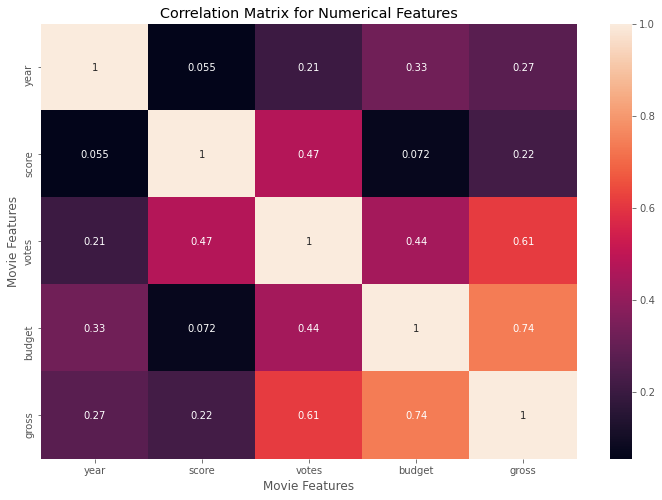

In [15]:
#Plotting the correlation matrix
correlation_matrix=df.corr(method='pearson') 
sns.heatmap(correlation_matrix,annot=True) 
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

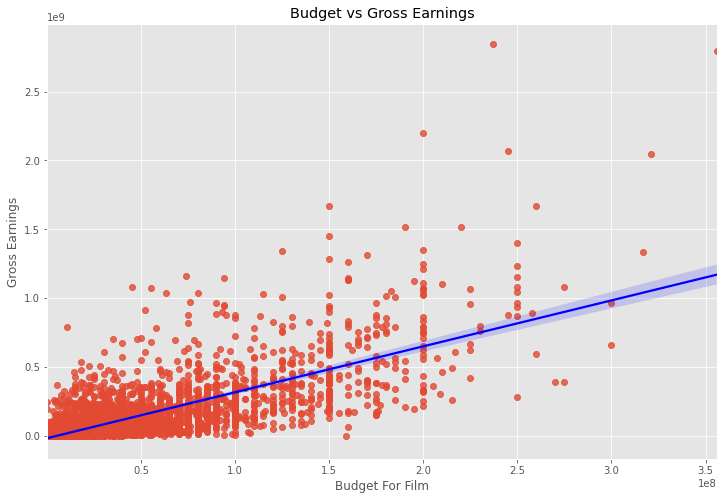

In [16]:
#Plot between Budget and Gross Earnings
sns.regplot(x="budget", y="gross", data=df,line_kws={'color':'blue'})
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross Earnings')
plt.show()

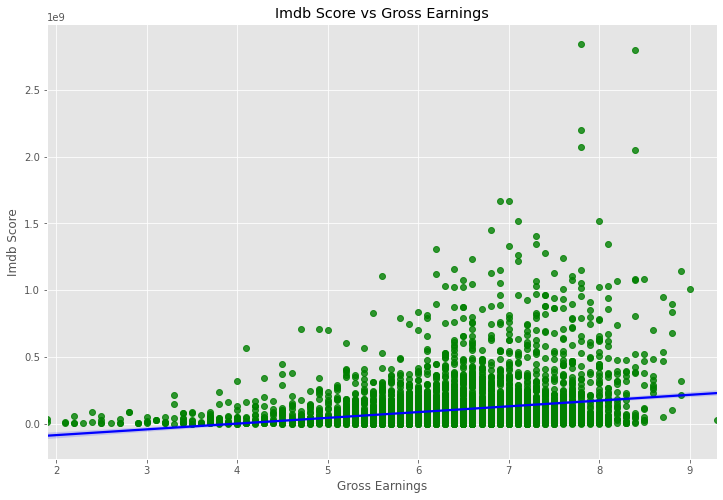

In [17]:
#Plot between Imbd Score and Gross Earnings
sns.regplot(x='score', y="gross", data=df,line_kws={'color':'blue'},scatter_kws={'color':'green'})   
plt.xlabel('Gross Earnings')
plt.ylabel('Imdb Score')
plt.title('Imdb Score vs Gross Earnings')
plt.show()

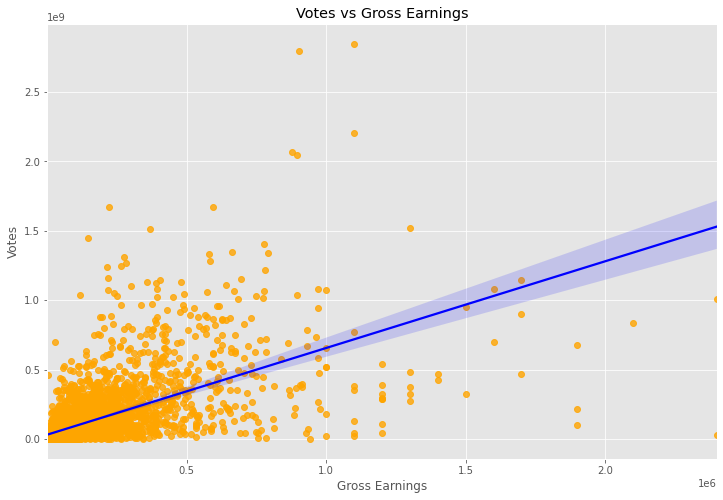

In [18]:
#Plot between Votes and Gross Earnings
sns.regplot(x='votes', y="gross", data=df,line_kws={'color':'blue'},scatter_kws={'color':'orange'})   
plt.xlabel('Gross Earnings')
plt.ylabel('Votes')
plt.title('Votes vs Gross Earnings')
plt.show()

## Step 4: Performing Some EDA on Gross Earnings 

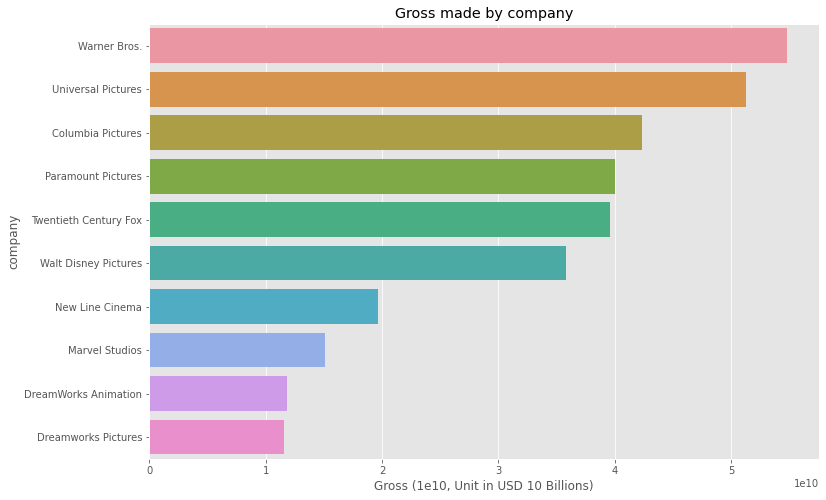

In [19]:
#Plotting the graph for companies that have the highest gross sum
df1 = df.groupby("company")['gross'].sum()
df1 = df1.reset_index().sort_values("gross", ascending=False)
sns.barplot(x = 'gross', y = 'company', data = df1[:10])
plt.title("Gross made by company")
plt.xlabel("Gross (1e10, Unit in USD 10 Billions)")
plt.show()

In [20]:
#Arranging Stars by the gross sum their movies have made
top_stars_num=20
star_gross = df.groupby('star')['gross'].agg(gross_sum='sum').reset_index()
star_gross.sort_values(by=['gross_sum'], ascending=False, inplace=True, ignore_index=True)

star_gross = star_gross.iloc[:top_stars_num]
star_gross

,star,gross_sum
0,Robert Downey Jr.,11855937746
1,Tom Hanks,9899944903
2,Tom Cruise,9602552559
3,Will Smith,7947279234
4,Johnny Depp,7410125354
5,Daniel Radcliffe,6971268037
6,Leonardo DiCaprio,6963367648
7,Vin Diesel,6036312568
8,Dwayne Johnson,5711270624
9,Bruce Willis,5318951036


<AxesSubplot:title={'center':'Top 10 Stars by Gross Sum'}, xlabel='star', ylabel='gross_sum'>

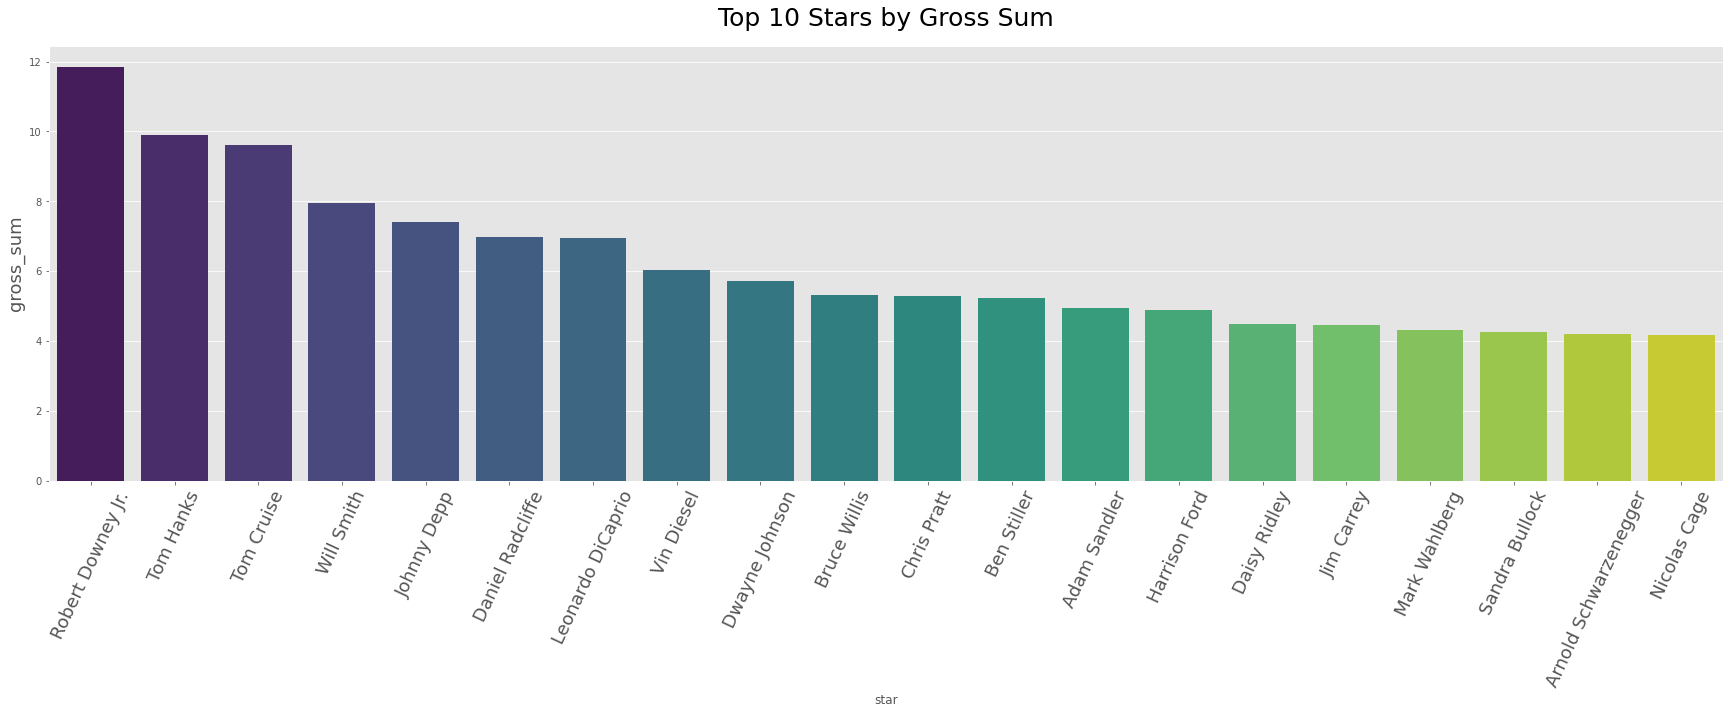

In [21]:
#Plotting graph for stars with highest gross sum

plt.figure(figsize=(30, 8))
plt.xticks(rotation=65, fontsize=18)
plt.ylabel("Gross Sum of Star (US$Billion)", fontsize=18)
plt.title("Top 10 Stars by Gross Sum", fontsize=25, pad=20)
sns.barplot(star_gross.star, star_gross.gross_sum/1000000000,palette='viridis')

In [22]:
#Highest Grossing Film 
df.sort_values(by='gross',ascending=False).head(1)



,name,genre,year,released,score,votes,director,writer,star,budget,gross,company
5445,Avatar,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox


In [23]:
#Lowest Grossing Film
df.sort_values(by='gross',ascending=True).head(1)


,name,genre,year,released,score,votes,director,writer,star,budget,gross,company
3203,Trojan War,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,15000000,309,Daybreak
